In [0]:
# !pip install keras
# !pip install tensorflow (CPU VERSION)
# !pip install tensorflow-gpu (GPU VERSION)

import csv
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

In [0]:
t= pd.read_csv('https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/Kaggle-Wine-train.csv')
t.to_csv('train.csv', index=False)

#sistemo CSV
with open('train.csv') as f_in, open('new_train.csv', 'w') as f_out:
    #crea il nuovo csv
    filewriter = csv.writer(f_out, delimiter=',')
    # Write header unchanged
    header = f_in.readline()
    f_out.write(header)

    reader = csv.reader(f_in)
    lines = list(reader)

    for line in lines:
        if line[2] != '' and float(line[2])>100:
            line[2]=float(line[2])/1000
        if line[8] != '' and float(line[8])>100:
            line[8]=float(line[8])/1000

    writer = csv.writer(f_out)
    writer.writerows(lines)

f_in.close()
f_out.close()


train = pd.read_csv('new_train.csv')
# pull data into target (y) and predictors (X)
train_y = train.Quality
#tengo volatile e density perchè li ho sistemati
predictor_cols = ['fixed.acidity','volatile.acidity','citric.acid','residual.sugar','chlorides','free.sulfur.dioxide',
                  'total.sulfur.dioxide','density','pH','sulphates','alcohol']
# Create training predictors data
train_X = train[predictor_cols]

scaler = StandardScaler()

train_X_std = scaler.fit_transform(train_X)

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(train_X_std)

# Impute our data, then train
train_X_imp = imp.transform(train_X_std)
print(train_X_imp.shape)

(3489, 11)


In [0]:
print(train_X_imp[0])

[-0.5457457   1.11042087 -1.04758863 -1.03382143  0.01255654 -0.01995263
 -0.07076563 -0.6089061  -0.23888975 -0.25872393 -0.23991364]


In [0]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam

def create_model(dim_layer1, dim_layer2, learning_rate, dropout) -> Model:
    input_layer = Input(shape=(11,))
    
    first_hidden = Dense(dim_layer1, kernel_initializer='uniform', activation='relu')(input_layer)
    
    dropout = Dropout(dropout)(first_hidden)
    
    second_hidden = Dense(dim_layer2, kernel_initializer='uniform', activation='relu')(dropout)
    
    output = Dense(1, kernel_initializer='uniform', activation='sigmoid')(second_hidden)
    
    model = Model(inputs=input_layer, outputs=output)
    
    adam = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy', 'mse'])
    
    model.summary()
    return model

Using TensorFlow backend.


In [0]:
import scipy.stats as stats
import math

dist_layer_1 = stats.randint(5, 10)
dist_layer_2 = stats.randint(8, 20)
dist_learning_rate = stats.randint(3, 6)
dist_dropout = stats.randint(1, 10)
EXPERIMENTS = 10

In [0]:
for i in range(10):
    LAYER_1 = dist_layer_1.rvs() * 10
    LAYER_2 = dist_layer_2.rvs() * 2
    LEARNING_RATE = math.pow(10, -dist_learning_rate.rvs())
    DROPOUT = dist_dropout.rvs()*0.05
    print('DIM LAYER 1: ',LAYER_1)
    print('DIM LAYER 2: ', LAYER_2)
    model = create_model(LAYER_1, LAYER_2, LEARNING_RATE, DROPOUT)
    # validation_split = 0.2 -> 20% usato come validation

DIM LAYER 1:  80
DIM LAYER 2:  34
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 11)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                960       
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 34)                2754      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 35        
Total params: 3,749
Trainable params: 3,749
Non-train

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 11)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 60)                720       
_________________________________________________________________
dropout_10 (Dropout)         (None, 60)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 18)                1098      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 19        
Total params: 1,837
Trainable params: 1,837
Non-trainable params: 0
_________________________________________________________________


In [0]:
    training_phase = model.fit(train_X_imp, train_y, validation_split=0.2, epochs=80, batch_size=512, verbose=2, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 2791 samples, validate on 698 samples
Epoch 1/80
 - 1s - loss: 0.2495 - acc: 0.6507 - mean_squared_error: 0.2495 - val_loss: 0.2487 - val_acc: 0.6633 - val_mean_squared_error: 0.2487
Epoch 2/80
 - 0s - loss: 0.2482 - acc: 0.6525 - mean_squared_error: 0.2482 - val_loss: 0.2470 - val_acc: 0.6633 - val_mean_squared_error: 0.2470
Epoch 3/80
 - 0s - loss: 0.2464 - acc: 0.6525 - mean_squared_error: 0.2464 - val_loss: 0.2446 - val_acc: 0.6633 - val_mean_squared_error: 0.2446
Epoch 4/80
 - 0s - loss: 0.2437 - acc: 0.6525 - mean_squared_error: 0.2437 - val_loss: 0.2410 - val_acc: 0.6633 - val_mean_squared_error: 0.2410
Epoch 5/80
 - 0s - loss: 0.2397 - acc: 0.6525 - mean_squared_error: 0.2397 - val_loss: 0.2357 - val_acc: 0.6633 - val_mean_squared_error: 0.2357
Epoch 6/80
 - 0s - loss: 0.2340 - acc: 0.6525 - mean_squared_error: 0.2340 - val_loss: 0.2285 - val_acc: 0.6633 - val_mean_squared_error: 0.2285
Epoch 7/80
 - 0s - loss: 0.2262 - a

 - 0s - loss: 0.1562 - acc: 0.7703 - mean_squared_error: 0.1562 - val_loss: 0.1565 - val_acc: 0.7765 - val_mean_squared_error: 0.1565
Epoch 56/80
 - 0s - loss: 0.1561 - acc: 0.7689 - mean_squared_error: 0.1561 - val_loss: 0.1564 - val_acc: 0.7779 - val_mean_squared_error: 0.1564
Epoch 57/80
 - 0s - loss: 0.1569 - acc: 0.7689 - mean_squared_error: 0.1569 - val_loss: 0.1562 - val_acc: 0.7822 - val_mean_squared_error: 0.1562
Epoch 58/80
 - 0s - loss: 0.1570 - acc: 0.7714 - mean_squared_error: 0.1570 - val_loss: 0.1559 - val_acc: 0.7837 - val_mean_squared_error: 0.1559
Epoch 59/80
 - 0s - loss: 0.1565 - acc: 0.7739 - mean_squared_error: 0.1565 - val_loss: 0.1554 - val_acc: 0.7794 - val_mean_squared_error: 0.1554
Epoch 60/80
 - 0s - loss: 0.1564 - acc: 0.7664 - mean_squared_error: 0.1564 - val_loss: 0.1552 - val_acc: 0.7794 - val_mean_squared_error: 0.1552
Epoch 61/80
 - 0s - loss: 0.1555 - acc: 0.7718 - mean_squared_error: 0.1555 - val_loss: 0.1549 - val_acc: 0.7808 - val_mean_squared_erro

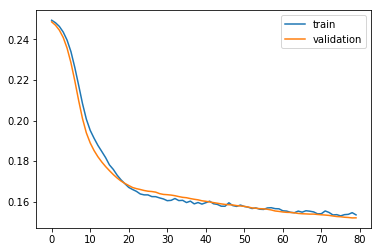

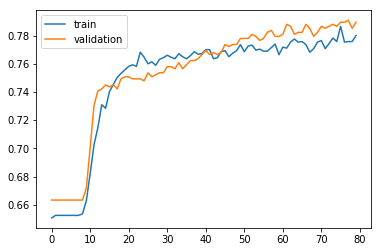

In [0]:
    import matplotlib.pyplot as pyplot
    
    # plot training history
    pyplot.plot(training_phase.history['loss'], label='train')
    pyplot.plot(training_phase.history['val_loss'], label='validation')
    pyplot.legend()
    pyplot.show()
    pyplot.plot(training_phase.history['acc'], label='train')
    pyplot.plot(training_phase.history['val_acc'], label='validation')
    pyplot.legend()
    pyplot.show()

In [0]:
    #TEST SET
    t= pd.read_csv('https://raw.githubusercontent.com/serivan/mldmlab/master/Datasets/Kaggle-Wine-test.csv')
    t.to_csv('test.csv', index=False)

    #sistemo csv
    with open('test.csv') as f_in, open('new_test.csv', 'w') as f_out:
        #crea il nuovo csv
        filewriter = csv.writer(f_out, delimiter=',')
        # Write header unchanged
        header = f_in.readline()
        f_out.write(header)

        reader = csv.reader(f_in)
        lines = list(reader)

        for line in lines:
            if line[2] != '' and float(line[2])>100:
                line[2]=float(line[2])/1000
            if line[8] != '' and float(line[8])>100:
                line[8]=float(line[8])/1000

        writer = csv.writer(f_out)
        writer.writerows(lines)

    f_in.close()
    f_out.close()

    test = pd.read_csv('new_test.csv')
    # Treat the test data in the same way as training data. In this case, pull same columns.
    test_X = test[predictor_cols]

    test_X_std = scaler.transform(test_X)

    # Impute each test item, then predict
    test_X_imp = imp.transform(test_X_std)

    # Use the model to make predictions
    predicted_q = model.predict(test_X_imp)
    # We will look at the predicted Qualities to ensure we have something sensible.
    predicted_q = [round(x[0]) for x in predicted_q]

    for i in range (0,len(predicted_q)):
        predicted_q[i]=int(predicted_q[i])

    print(predicted_q)

    #prepare kaggle submission
    my_submission = pd.DataFrame({'Id': test.Id, 'Quality': predicted_q})
    # you could use any filename. We choose submission here
    my_submission.to_csv('submission.csv', index=False)

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 